# 1. Load and Explore Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import SGD

### Normalize pixel values

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Reshape the dataset for CNN input

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

### Define class names

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# 2. Data Augmentation

In [7]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

train_datagen.fit(x_train)

# 3. Model Building

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

/Users/abhishekzade/Desktop/CS7GV1 Computer Vision/tf_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-06 20:51:23.884477: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-12-06 20:51:23.884696: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-06 20:51:23.884707: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-06 20:51:23.884745: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-06 20:51:23.884921: I tensorflow/core/common_runtime/pluggable_devi

### Compile the model

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# 4. Training

In [10]:
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10


/Users/abhishekzade/Desktop/CS7GV1 Computer Vision/tf_env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-12-06 20:51:25.011127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.5960 - loss: 1.2067 - val_accuracy: 0.7571 - val_loss: 0.7090
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.7359 - loss: 0.7383 - val_accuracy: 0.7962 - val_loss: 0.5828
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.7450 - loss: 0.7308 - val_accuracy: 0.7720 - val_loss: 0.6259
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.7495 - loss: 0.7509 - val_accuracy: 0.8095 - val_loss: 0.5683
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.7438 - loss: 0.7886 - val_accuracy: 0.7774 - val_loss: 0.7379
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.7403 - loss: 0.8631 - val_accuracy: 0.7474 - val_loss: 0.7942
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.7301 - loss: 0.9581 - val_accuracy: 0.7666 - val_loss: 0.7183
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.7299 - loss: 1.0235 - val_accurac

# 5. Evaluation

### Classification Metrics

In [11]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.67      0.74      0.71      1000
     Trouser       0.98      0.94      0.96      1000
    Pullover       0.79      0.61      0.69      1000
       Dress       0.58      0.73      0.64      1000
        Coat       0.48      0.84      0.61      1000
      Sandal       0.90      0.93      0.92      1000
       Shirt       0.54      0.11      0.18      1000
     Sneaker       0.94      0.79      0.86      1000
         Bag       0.96      0.95      0.96      1000
  Ankle boot       0.87      0.94      0.90      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.74     10000
weighted avg       0.77      0.76      0.74     10000



### Confusion Matrix

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[742   2  15 195  21   4  16   0   5   0]
 [  2 936   1  35  16   3   3   0   4   0]
 [159   1 607  11 188   0  30   0   4   0]
 [ 19   7  14 728 216   3  13   0   0   0]
 [ 13   3  57  55 842   2  25   0   3   0]
 [  2   3   0  13   0 934   0  37   0  11]
 [157   2  72 180 459   2 106   0  22   0]
 [  0   1   0   4   0  73   0 789   0 133]
 [  5   0   0   3  23  11   2   3 953   0]
 [  1   2   0  40   0   8   0  13   0 936]]


### Plot Training and Validation Loss/Accuracy

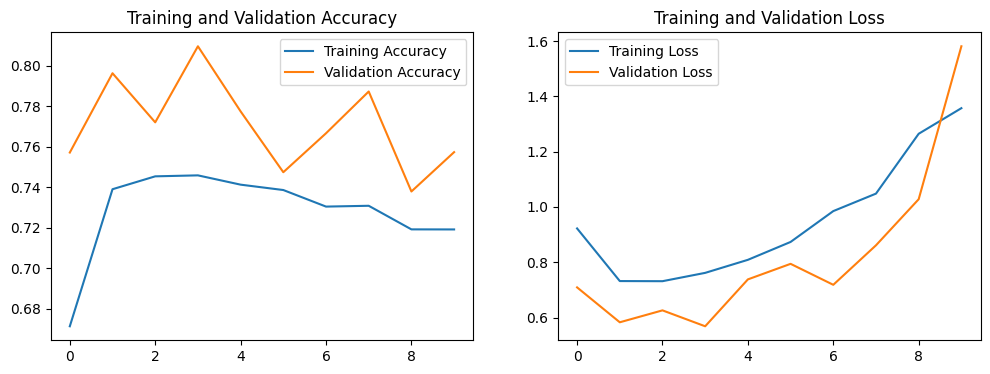

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Save the model

In [14]:
model.save("fashion_mnist_cnn_model.h5")